In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
pd.set_option('display.max_columns', 100)

### Исследование и подготовка данных

In [3]:
data = pd.read_csv('movie_metadata.csv')

In [4]:
data.head()


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [5]:
data.shape

(5043, 28)

In [6]:
#Избавимся от повторяющихся данных
data = data.drop_duplicates()

In [7]:
data.shape

(4998, 28)

In [8]:
data.loc[data['gross'].isnull()].head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
84,Color,Roland Joffé,10.0,109.0,596.0,283.0,Alice Englert,622.0,NaN,Action|Adventure|Romance|Sci-Fi,Tamsin Egerton,The Lovers,2138,1982,Bipasha Basu,3.0,1770s|british india|great barrier reef|india|ring,http://www.imdb.com/title/tt1321869/?ref_=fn_t...,15.0,English,Belgium,R,NaN,2015.0,525.0,4.5,NaN,677
98,Color,Hideaki Anno,1.0,120.0,28.0,12.0,Shin'ya Tsukamoto,544.0,NaN,Action|Adventure|Drama|Horror|Sci-Fi,Mark Chinnery,Godzilla Resurgence,374,699,Atsuko Maeda,0.0,blood|godzilla|monster|sequel,http://www.imdb.com/title/tt4262980/?ref_=fn_t...,13.0,Japanese,Japan,NaN,NaN,2016.0,106.0,8.2,2.35,0
177,Color,NaN,21.0,60.0,NaN,184.0,Philip Michael Thomas,982.0,NaN,Action|Crime|Drama|Mystery|Thriller,Don Johnson,Miami Vice,16769,1687,John Diehl,2.0,cult tv|detective|drugs|police|undercover,http://www.imdb.com/title/tt0086759/?ref_=fn_t...,74.0,English,USA,TV-14,1500000.0,NaN,321.0,7.5,1.33,0
199,Color,Matt Birch,1.0,NaN,0.0,159.0,Dave Legeno,10000.0,NaN,Action|Fantasy,Rupert Grint,Harry Potter and the Deathly Hallows: Part II,381,11036,Ralph Ineson,1.0,NaN,http://www.imdb.com/title/tt1680310/?ref_=fn_t...,2.0,English,UK,NaN,NaN,2011.0,570.0,7.5,NaN,40


Удалим строки с нулевыми данными

In [9]:
data = data.dropna(subset=['gross', 'movie_facebook_likes'])

In [10]:
data.shape

(4124, 28)

Извлекем из данных необходимый признак и целевую переменну

In [11]:
target = data.gross
target.shape

(4124,)

In [12]:
feature = data.movie_facebook_likes
feature.shape

(4124,)

Разобьем данные на те на которых будем искать коэфф. уравнения лин.регрессии и те данные на которых будем проверять эффективность модели

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(feature, target, test_size=0.3, random_state=42)

In [15]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((2886,), (1238,), (2886,), (1238,))

С помощью гистограмм и графиков исследуем данные на нормальность распределения и выбросы

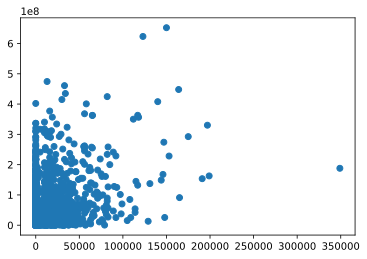

In [16]:
plt.scatter(X_train, Y_train)

Из графика видно, что фактор и целевая переменная не имеют выраженной линейной зависимости

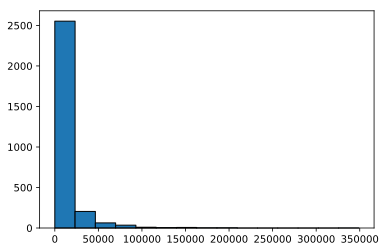

In [17]:
plt.hist(X_train, bins=15, edgecolor='black');

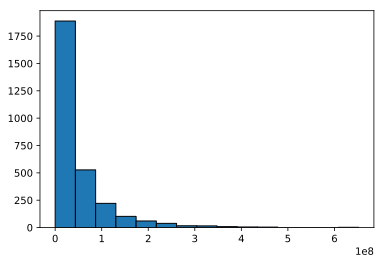

In [18]:
plt.hist(Y_train, bins=15, edgecolor='black');

Явная линейная зависимость будет иметь место, если переменные будут распределены нормально, из графиков видно, что это не так

### Расчет коэффициентов уравнения регрессии

In [19]:
b1 = (np.mean(X_train.values * Y_train.values) - np.mean(X_train.values) * np.mean(Y_train.values))/(np.mean(X_train.values**2) - np.mean(X_train.values) ** 2)
b0 = np.mean(Y_train.values) - b1 * np.mean(X_train.values)
print(f'b1: {b1}\nb0: {b0}')

b1: 1159.6203604385234
b0: 37377114.906647995


Уравнение линейной регрессии имеет вид:

$$y = 37377114.906647995 + 1159.6203604385234 \cdot x,$$

Построим график уравнения на данных

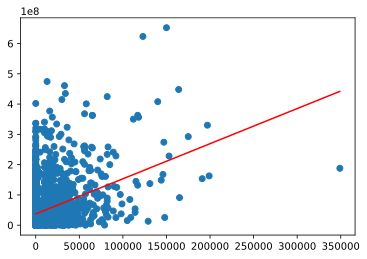

In [20]:
x = X_train.values
y = Y_train.values
plt.scatter(x, y)
y1 = b0 + b1 * x
plt.plot(x, y1, color='red')

### Вычислим предсказанные значения на тестовых данных

In [21]:
Y_pred = b0 + b1 * X_test

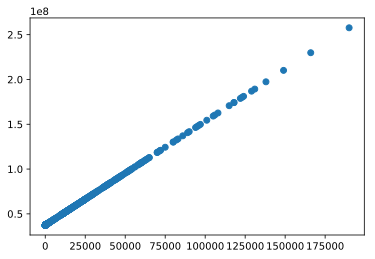

In [22]:
plt.scatter(X_test, Y_pred)

### Оценим качество модели

Вычислим коэффициент детерминации:

In [23]:
R2 = Y_pred.var() / Y_test.var()
R2

0.10370535992804143

Построенная модель объясняет лишь 10% дисперсии реальных данных

Вычислим среднюю ошибку аппроксимации:

In [24]:
A = np.abs((Y_test.values - Y_pred.values) / Y_test.values).mean()
A

455.41710493724077

$\overline{A}$ превышает $8-10 \%$, т.е. предсказанные данные имеют существенные отклонения от действительных

Оценим статистическую значимость уравнения регрессии с помощью F-критерия Фишера

In [25]:
k1 = 1
k2 = len(Y_pred.values) - k1 -1
T = (R2 / (1 - R2)) * (k2 / k1)
T

143.01081267290448

Для уровня значимости $\alpha = 0.05$ посчитаем  $F_{crit} $ с помощью `scipy`:

In [26]:
from scipy import stats

In [27]:
alpha = 0.05
F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

3.848993328999265

$T > F_{crit}$, значит уравнение линейной регрессии статистически значимо.

#### Вывод: Прибыль от кинокартины и лайки премьеры на Facebook не имеют линейной зависимости, т.е. прибыль зависитот других факторов или от совокупности каких то факторов.